# Downloading and Prepping Data <a id="2"></a>

Nama : Dita Noviyanti

Kelas:IF-42-GAB

NIM: 1301194125

Import primary modules.

In [12]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


Download the dataset and read it into a *pandas* dataframe.

In [14]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [15]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [16]:
df_can.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

In [31]:
### type your answer here
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents2013 = df_continents.filter(['2013'])
df_continents2013


,2013
Continent,
Africa,38543
Asia,155075
Europe,28691
Latin America and the Caribbean,24950
Northern America,8503
Oceania,1775


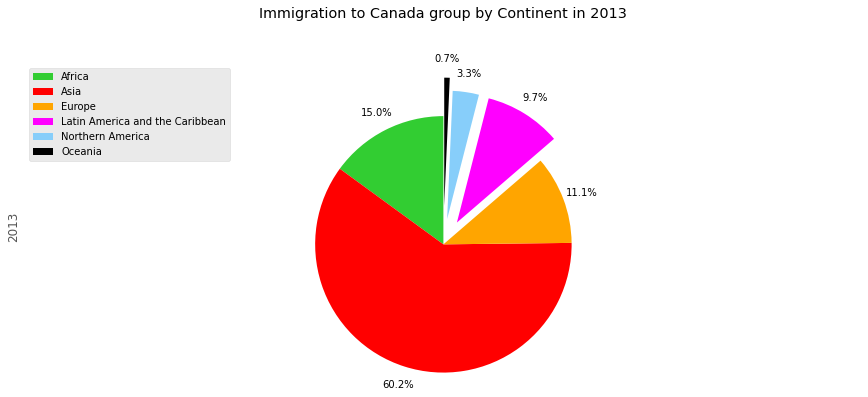

In [30]:
colour_list = ['limegreen', 'red', 'orange', 'magenta', 'lightskyblue', 'black']
explode_list = [0, 0, 0, 0.2, 0.2, 0.3]

df_continents2013['2013'].plot(kind='pie',
                              figsize=(15, 6),
                              autopct='%1.1f%%', 
                              startangle=90,     
                              shadow=False,
                              labels = None,
                              pctdistance=1.15,
                              colors=colour_list,
                              explode = explode_list,           
                              )

plt.title('Immigration to Canada group by Continent in 2013', y = 1.12)
plt.axis('equal') 
plt.legend(labels=df_continents2013.index, loc='upper left') 
plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [19]:
### type your answer here
df_PA = df_can.loc[['Pakistan', 'Afghanistan']]
df_PA.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


Step 2: Plot data.

Untuk membandingkan jumlah immigran dari Pakistan dan Afghanistan, saya menggunakan kolom total untuk melakukan plot data dengan pie chart

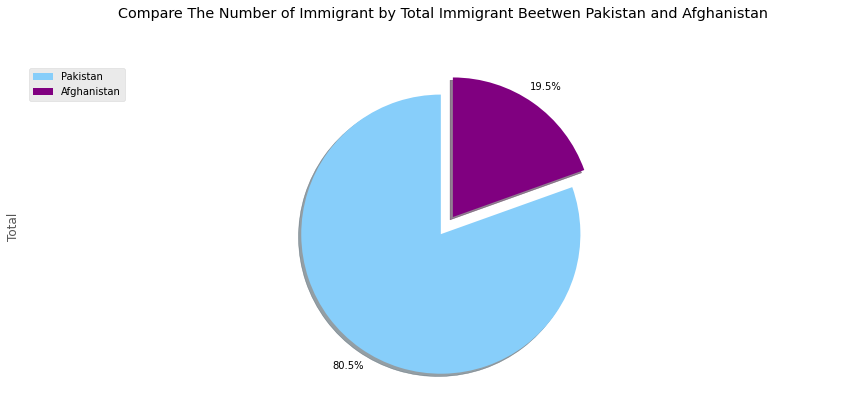

In [32]:
##pie chart to compare total immigrant from Pakistan and Afghanistan

df_PApie = df_PA.filter(['Total'])
colour_list = ['lightskyblue', 'purple']
explode_list = [0, 0.15]

df_PApie['Total'].plot(kind='pie',
              figsize=(15, 6),
              autopct='%1.1f%%', 
              startangle=90,     
              shadow=True,
              labels = None,
              pctdistance=1.15,
              colors=colour_list,
              explode = explode_list,           
              )

plt.title('Compare The Number of Immigrant by Total Immigrant Beetwen Pakistan and Afghanistan', y = 1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_PApie.index, loc='upper left') 
plt.show()



kemudian saya melakukan plot data dengan menggunakan line chart namun menggunakan kolom 1980 sampai 2013

In [21]:
##line chart to compare total immigrant from Pakistan and Afghanistan
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))
#years

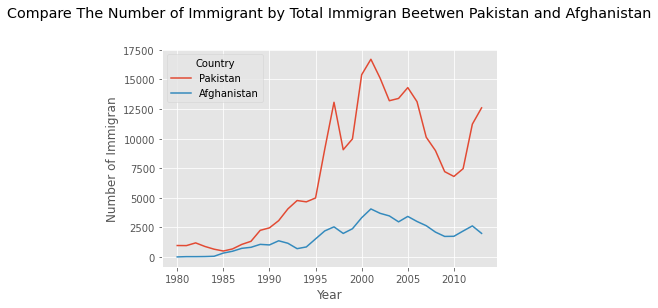

In [22]:
df_PAline = df_can.loc[['Pakistan','Afghanistan'],years]
df_PAline = df_PAline.transpose()
df_PAline.index = df_PAline.index.map(int)
df_PAline.plot(kind='line')

plt.title('Compare The Number of Immigrant by Total Immigran Beetwen Pakistan and Afghanistan', y = 1.12)
plt.ylabel('Number of Immigran')
plt.xlabel('Year')
plt.show()

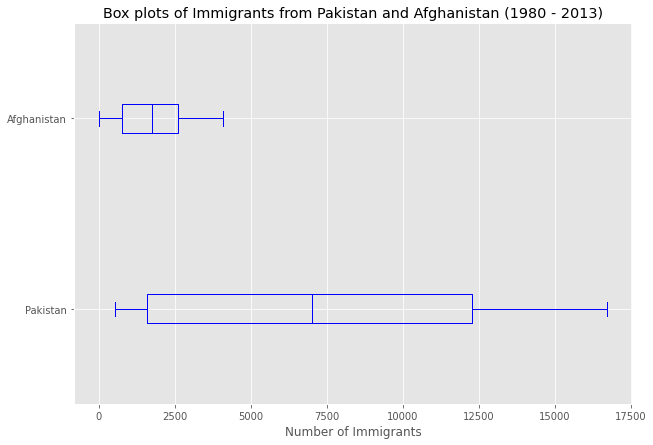

In [23]:
df_PAbox = df_can.loc[['Pakistan','Afghanistan'],years]
df_PAbox = df_PAbox.transpose()
df_PAbox.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from Pakistan and Afghanistan (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [24]:
### type your answer here
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden']]
df_countries.drop(['Continent', 'Region', 'DevName'], axis=1, inplace=True)

df_total = pd.DataFrame(df_countries[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']
df_total.head()



,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

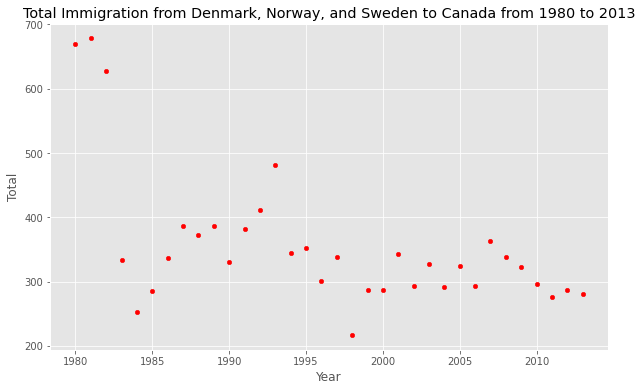

In [25]:
### type your answer here
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='red')

plt.title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Total')

plt.show()




**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [26]:
### type your answer here
df_can_t = df_can.loc[['China','India'],years]
df_can_t = df_can_t.transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head(3)

Country,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147


In [27]:
#normalisai data China
norm_China = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

#normalisasi data India
norm_India = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


Step 2: Generate the bubble plots.

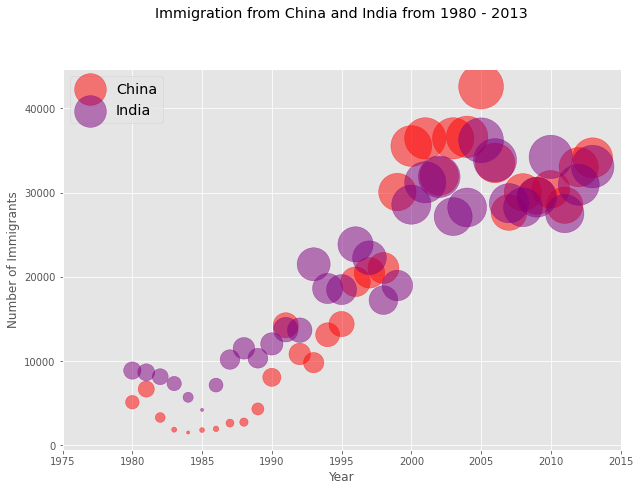

In [28]:
### type your answer here
#China
China = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(10, 7),
                    alpha=0.5,               
                    color='red', 
                    s=norm_China * 2000 + 10, 
                    xlim=(1975, 2015)
                   )

#India
India = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    figsize=(10, 7),
                    alpha=0.5,               
                    color='purple', 
                    s=norm_India * 2000 + 10, 
                    ax = China
                   )
China.set_ylabel('Number of Immigrants')
China.set_title('Immigration from China and India from 1980 - 2013', y=1.12)
China.legend(['China', 'India'], loc='upper left', fontsize='x-large')


# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).